In [1]:
import import_ipynb

In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import scipy.sparse as sp
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram

In [3]:
def spectral(G,k = 20):
    #  matrix for computation
    n = len(G.nodes())
    A = nx.to_scipy_sparse_matrix(G)
    deg = sp.csr_matrix.dot(A, np.ones(n))
    D = sp.diags(deg)
    L = D - A
    
    # Spectral decomposition
    lam,V = sp.linalg.eigsh(L, min(k,n - 1), sigma = -1)
    index = np.argsort(lam)
    lam,V = lam[index],V[:,index]

    return sch.linkage(V,method =  'single')

In [4]:
def plot_dendrogram(D, logscale = True):
    plt.figure(figsize=(25, 10))
    Dlog = D.copy()
    if logscale:
        Dlog[:,2] = np.log(Dlog[:,2])
        Dlog[1:,2] =  Dlog[1:,2] - Dlog[1,2]
        Dlog[0,2] = 0
    dendrogram(Dlog,leaf_rotation=90.)
    plt.axis('off')
    plt.show()

In [5]:
G = nx.read_graphml("C:/Users/amin/Downloads/project computational and pattern/hierarchical/openstreet.graphml", node_type = int)
print(nx.info(G))

Name: Openstreet
Type: Graph
Number of nodes: 5993
Number of edges: 6958
Average degree:   2.3220


In [6]:
D=spectral(G)

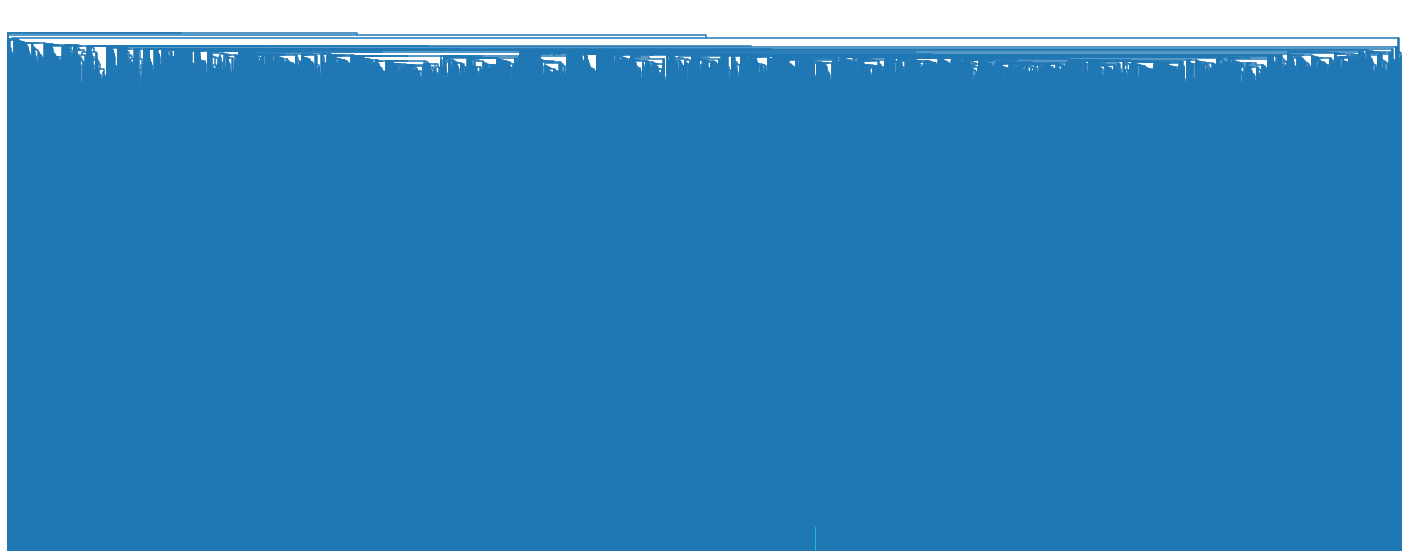

In [7]:
plot_dendrogram(D) 